In [1]:
import pandas as pd
import seaborn as sns
sns.set_style('white')
sns.set(font_scale=1.4)

In [2]:
df = (pd.read_csv('https://github.com/data-8/textbook/raw/main/assets/data/ckd.csv')
     .rename(columns={'Blood Glucose Random':'Glucose'})
     )

In [3]:
df

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Red Blood Cells,Pus Cell,Pus Cell clumps,Bacteria,Glucose,...,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Hypertension,Diabetes Mellitus,Coronary Artery Disease,Appetite,Pedal Edema,Anemia,Class
0,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
1,53,90,1.020,2,0,abnormal,abnormal,present,notpresent,70,...,29,12100,3.7,yes,yes,no,poor,no,yes,1
2,63,70,1.010,3,0,abnormal,abnormal,present,notpresent,380,...,32,4500,3.8,yes,yes,no,poor,yes,no,1
3,68,80,1.010,3,2,normal,abnormal,present,present,157,...,16,11000,2.6,yes,yes,yes,poor,yes,no,1
4,61,80,1.015,2,0,abnormal,abnormal,notpresent,notpresent,173,...,24,9200,3.2,yes,yes,yes,poor,yes,yes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,0
154,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,0
155,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,0
156,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,0


<AxesSubplot:xlabel='Hemoglobin', ylabel='Glucose'>

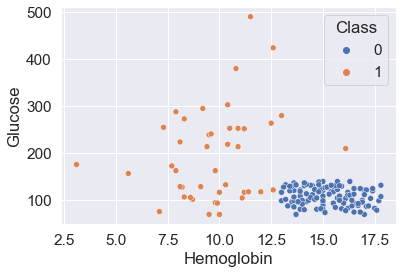

In [4]:
sns.scatterplot(data=df,x='Hemoglobin',y='Glucose',hue='Class')

## Select only numeric columns

In [5]:
df2 = df[df.select_dtypes(include='number').columns]

## KNN

In [6]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## Split dataset

In [7]:
df2

,Age,Blood Pressure,Specific Gravity,Albumin,Sugar,Glucose,Blood Urea,Serum Creatinine,Sodium,Potassium,Hemoglobin,Packed Cell Volume,White Blood Cell Count,Red Blood Cell Count,Class
0,48,70,1.005,4,0,117,56,3.8,111,2.5,11.2,32,6700,3.9,1
1,53,90,1.020,2,0,70,107,7.2,114,3.7,9.5,29,12100,3.7,1
2,63,70,1.010,3,0,380,60,2.7,131,4.2,10.8,32,4500,3.8,1
3,68,80,1.010,3,2,157,90,4.1,130,6.4,5.6,16,11000,2.6,1
4,61,80,1.015,2,0,173,148,3.9,135,5.2,7.7,24,9200,3.2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,55,80,1.020,0,0,140,49,0.5,150,4.9,15.7,47,6700,4.9,0
154,42,70,1.025,0,0,75,31,1.2,141,3.5,16.5,54,7800,6.2,0
155,12,80,1.020,0,0,100,26,0.6,137,4.4,15.8,49,6600,5.4,0
156,17,60,1.025,0,0,114,50,1.0,135,4.9,14.2,51,7200,5.9,0


In [8]:
X = df2.iloc[:,0:2]
y = df2.iloc[:,-1]

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=100,test_size=0.2)

## Feature Scaling

In [9]:
sc_X = StandardScaler()

X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

## Run KNN

In [10]:
# Define the model
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')

In [11]:
# Fit model
classifier.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=11)

In [12]:
# Predict results

y_pred = classifier.predict(X_test)

In [13]:
cm = confusion_matrix(y_test,y_pred)

In [14]:
cm

array([[20,  0],
       [ 7,  5]])

In [15]:
f1_score(y_test,y_pred)

0.5882352941176471

In [16]:
accuracy_score(y_test,y_pred)

0.78125